In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

In [3]:
df = pd.read_csv(r"C:\Users\yitin\Desktop\attention\market_svi_edgar.csv")
df_com =  pd.read_csv(r"C:\Users\yitin\Desktop\attention\investor-attention-returns-patern\data\companies_after_2005.csv")
df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0


In [4]:
df_com.head()

,Unnamed: 0,Rank,Name,Symbol,marketcap,price (USD),country,IPO_year,capitalization
0,0,1,Microsoft,MSFT,3002343620608,404.06,United States,1986,high
1,1,2,Apple,AAPL,2815212650496,182.31,United States,1980,high
2,2,4,NVIDIA,NVDA,1793541144576,726.13,United States,1999,high
3,3,5,Amazon,AMZN,1760768032768,169.51,United States,1997,high
4,4,6,Alphabet (Google),GOOG,1753911394304,141.76,United States,2004,high


In [5]:
merged_df = pd.merge(df, df_com[['Symbol', 'capitalization']], left_on='symbol', right_on='Symbol', how='left')

merged_df.drop(columns=['Symbol'], inplace=True)

merged_df['weekly_return'] = (merged_df['price'] - merged_df.groupby('symbol')['price'].shift(1)) / merged_df.groupby('symbol')['price'].shift(1)
merged_df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume,capitalization,weekly_return
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0,high,NaN
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0,high,-0.020622
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0,high,-0.017994
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0,high,0.020663
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0,high,0.005348


In [6]:
low = merged_df['capitalization'] == 'low'
low_cap = merged_df[low]['symbol'].unique()
low_cap

array(['DNN', 'VEON', 'VRTS', 'LKFN', 'CPRX', 'TRMK', 'NBTB', 'CXW',
       'POM.PA', 'BB', 'THRM', 'LZB', 'NSSC', 'SPNS', 'DVAX', 'EIF.TO',
       'TTMI', 'TDS', 'CBRL', 'TARO', 'NTCT', 'CSGS', 'EXTR', 'MRTN',
       'OXM', 'FRU.TO', 'BANR', 'HLX', 'JACK', 'AMWD', 'GPRE', 'UFPT',
       'LIF.TO', 'FBNC', 'FNLC', 'GTY', 'FWRG', 'HWKN', 'HTLF', 'IMKTA',
       'CFP.TO', 'ENGH.TO', 'CTS', 'SYBT', 'FCF', 'LNN', 'LTC', 'CAL',
       'KFRC', 'GES', 'NWN', 'PDFS', 'WG.L', 'ANZFF', 'AG', 'OMCL',
       'LGND', 'BUSE', 'SMTC', 'DBD', 'SPH', 'CMCO', 'WABC', 'MDA.TO',
       'RPT', 'TGI', 'AIV', 'INE.TO', 'MFA', 'NX', 'CGAU', 'PRAA', 'GERN',
       'PERI', 'BHE', 'MGNX', 'GIII'], dtype=object)

In [14]:
high = merged_df['capitalization'] == 'high'
high_cap = merged_df[high]['symbol'].unique()
high_cap

array(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'BRK-B', 'LLY', 'TSM',
       'NVO', 'JPM', 'UNH', 'WMT', 'XOM', 'JNJ', 'PG', 'ASML', 'HD',
       'TCEHY', 'MRK', 'COST', 'TM', 'ORCL', 'CVX', 'AMD', 'CRM', 'BAC',
       'KO', 'NFLX', 'TMO', 'MCD', 'SAP', 'DIS', '601857.SS', 'AZN',
       'ABT', 'CSCO', 'TMUS', 'WFC', 'DHR', 'INTC', 'INTU', 'IBM', 'QCOM',
       'VZ', 'AMAT', 'CMCSA', 'CAT', 'NKE', 'PFE', 'AXP', 'AMGN', 'UNP',
       'TXN', 'SIE.DE', 'MS', 'RY', 'HDB', 'ISRG', 'SPGI', 'SYK', 'IDEXY',
       'LOW', 'COP', 'HON', 'BKNG', 'UL', 'UPS', 'PLD', 'AIR.PA', 'GS',
       'BA', 'BUD', 'LRCX', 'T', 'RTX', 'DTE.DE', 'BLK', 'SCHW', 'NEE',
       'SNY', 'PBR', 'MDT', 'RIO', 'TJX', 'PGR', 'SONY', 'VRTX', 'TD',
       'SBUX', 'C', 'ALV.DE', 'REGN', 'ADP', 'LMT', 'DE', 'BMY', 'BP',
       'CI', 'MMC', 'CVS', 'MDLZ', 'BSX', 'EL.PA', 'CSL.AX', 'KLAC',
       'GILD', 'FI', 'MU', 'AMT', 'IBN', '9983.T', 'GSK', 'INFY', 'SNPS',
       '8058.T', 'CNI', '0883.HK', 'HCA', 'DEO', '9984.T', 'WM', 'R

In [84]:
def plot_compare(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['svi', 'edgar', 'weekly_return']]

    # Calculate moving averages
    svi_ma = data_to_plot['svi'].rolling(window=window).mean()
    edgar_ma = data_to_plot['edgar'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    svi_ma_normalized = scaler.fit_transform(svi_ma.values.reshape(-1, 1)).flatten()
    edgar_ma_normalized = scaler.fit_transform(edgar_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, svi_ma_normalized, label=f'SVI Moving Average ({window} weeks)')
    ax.plot(week_numbers, edgar_ma_normalized, label=f'EDGAR Moving Average ({window} weeks)')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def plot_comparison_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        plot_compare(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

In [95]:
def compare_svi(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['svi', 'weekly_return']]

    # Calculate moving averages
    svi_ma = data_to_plot['svi'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    svi_ma_normalized = scaler.fit_transform(svi_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, svi_ma_normalized, label=f'SVI Moving Average ({window} weeks)', color='blue')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)', color='green')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def compare_svi_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        compare_svi(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

In [96]:
def compare_edgar(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['edgar', 'weekly_return']]

    # Calculate moving averages
    edgar_ma = data_to_plot['edgar'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    edgar_ma_normalized = scaler.fit_transform(edgar_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, edgar_ma_normalized, label=f'EDGAR Moving Average ({window} weeks)', color='orange')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)', color='green')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def compare_edgar_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        compare_edgar(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

High Capital companies comparision

1. IT

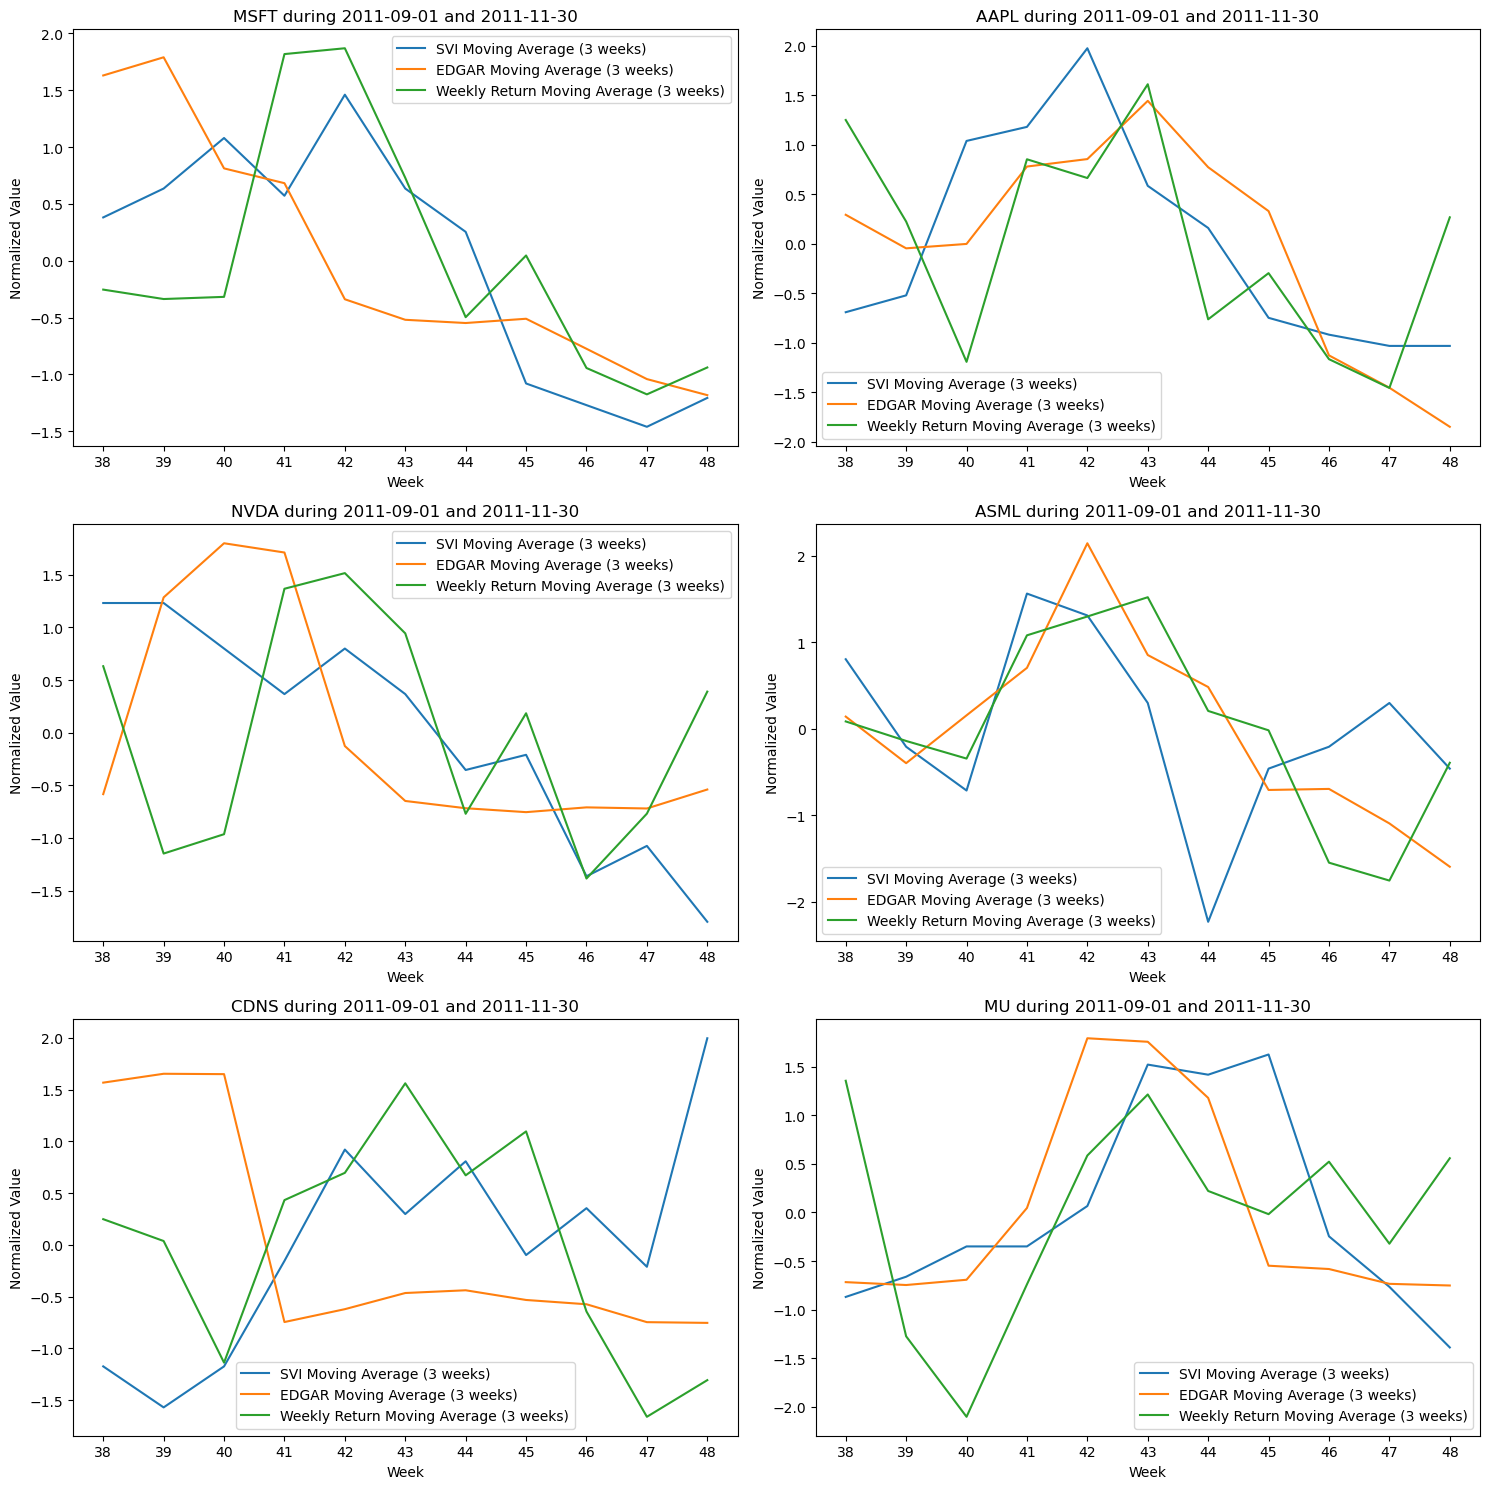

In [85]:
it_com = ['MSFT', 'AAPL', 'NVDA', 'ASML', 'CDNS', 'MU']
plot_comparison_grid(it_com, '2011', '2011-09-01', '2011-11-30')

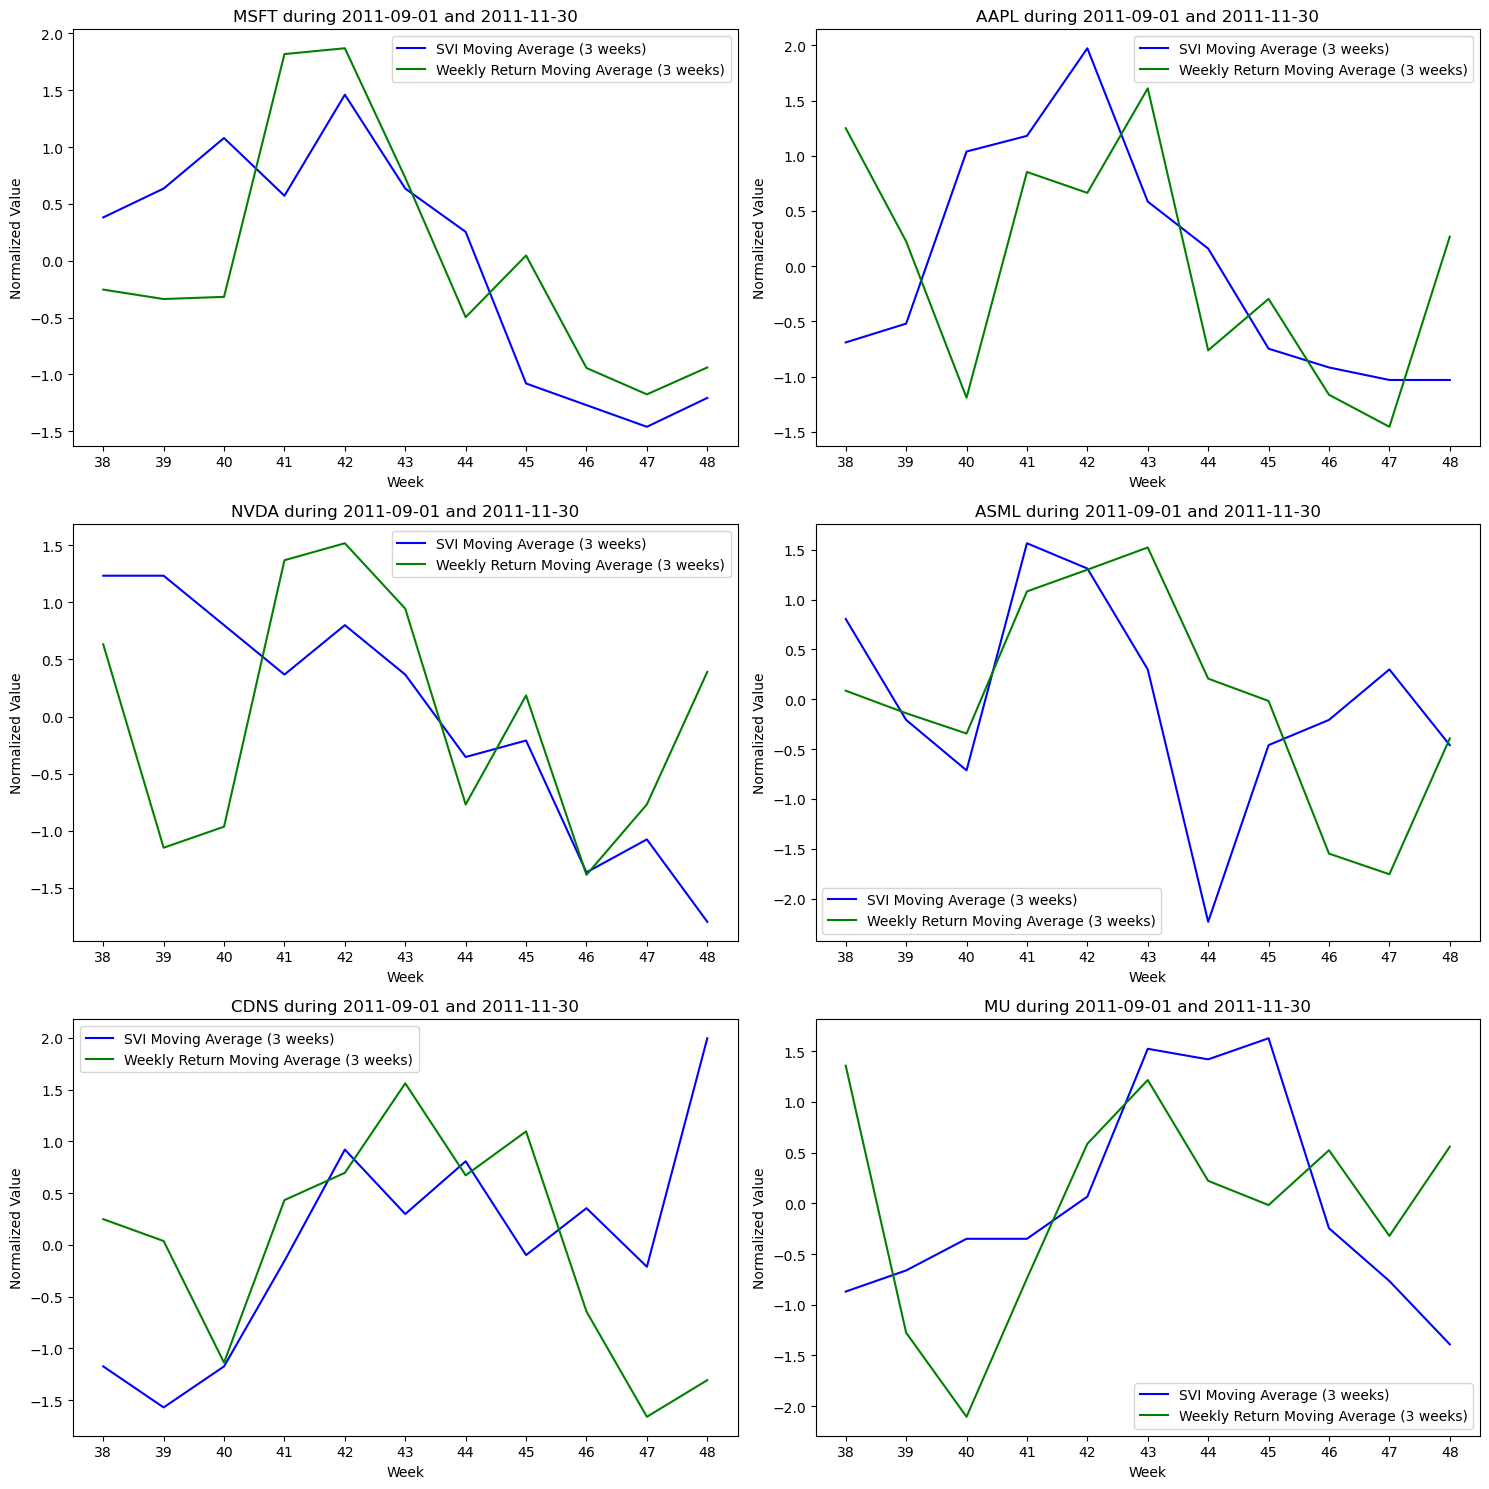

In [97]:
compare_svi_grid(it_com, '2011', '2011-09-01', '2011-11-30')

The graph shows a strong positive correlation between SVI and Return, especially when SVI undergoes significant changes. For instance, after the 42nd week, when SVI sharply decreases for MSFT, Return also experiences a sharp decline. Similarly, for APPL, when SVI rises between the 38th and 42nd weeks, Return also increases, with a lag in peak values.

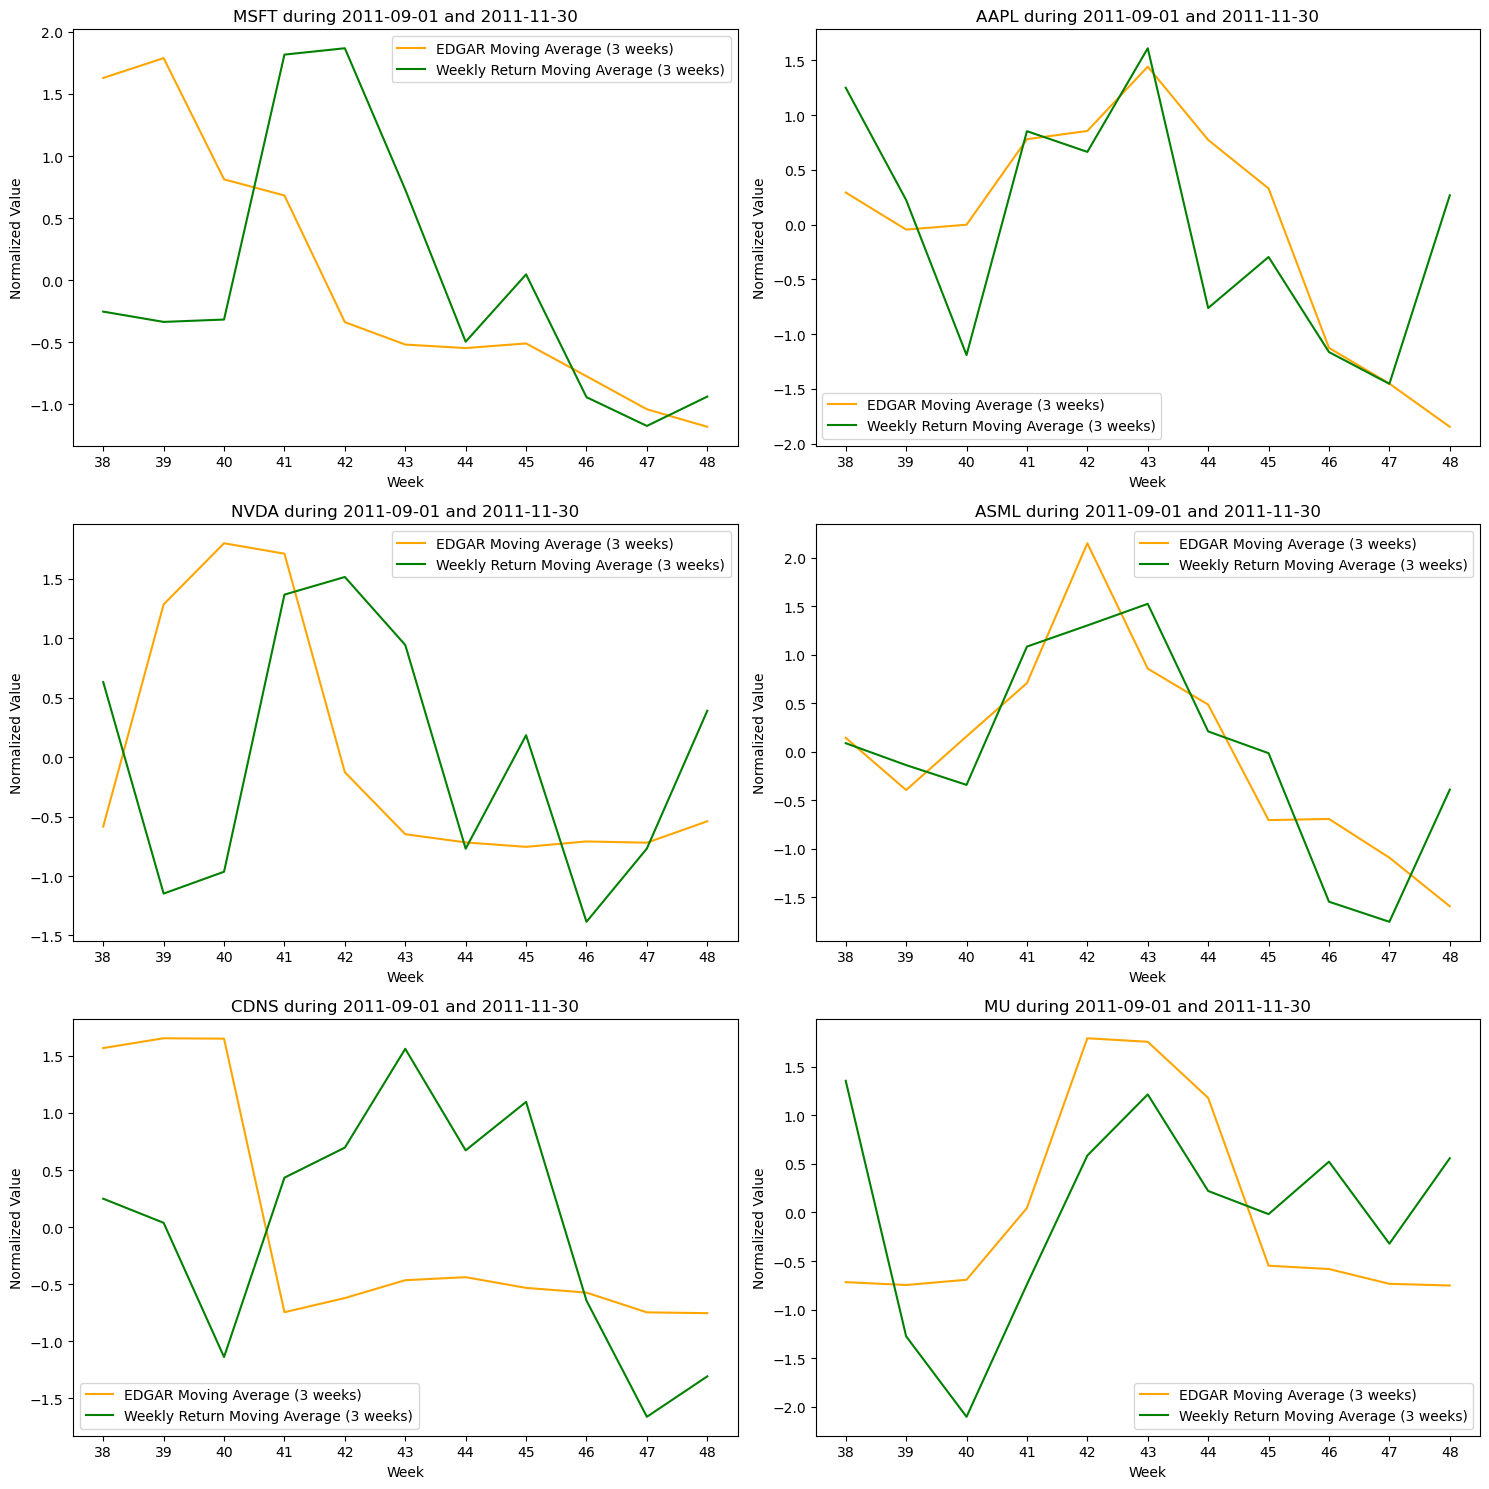

In [98]:
compare_edgar_grid(it_com, '2011', '2011-09-01', '2011-11-30')

Similarly, there is a certain positive correlation and lag between EDGAR and return.

2. Finance

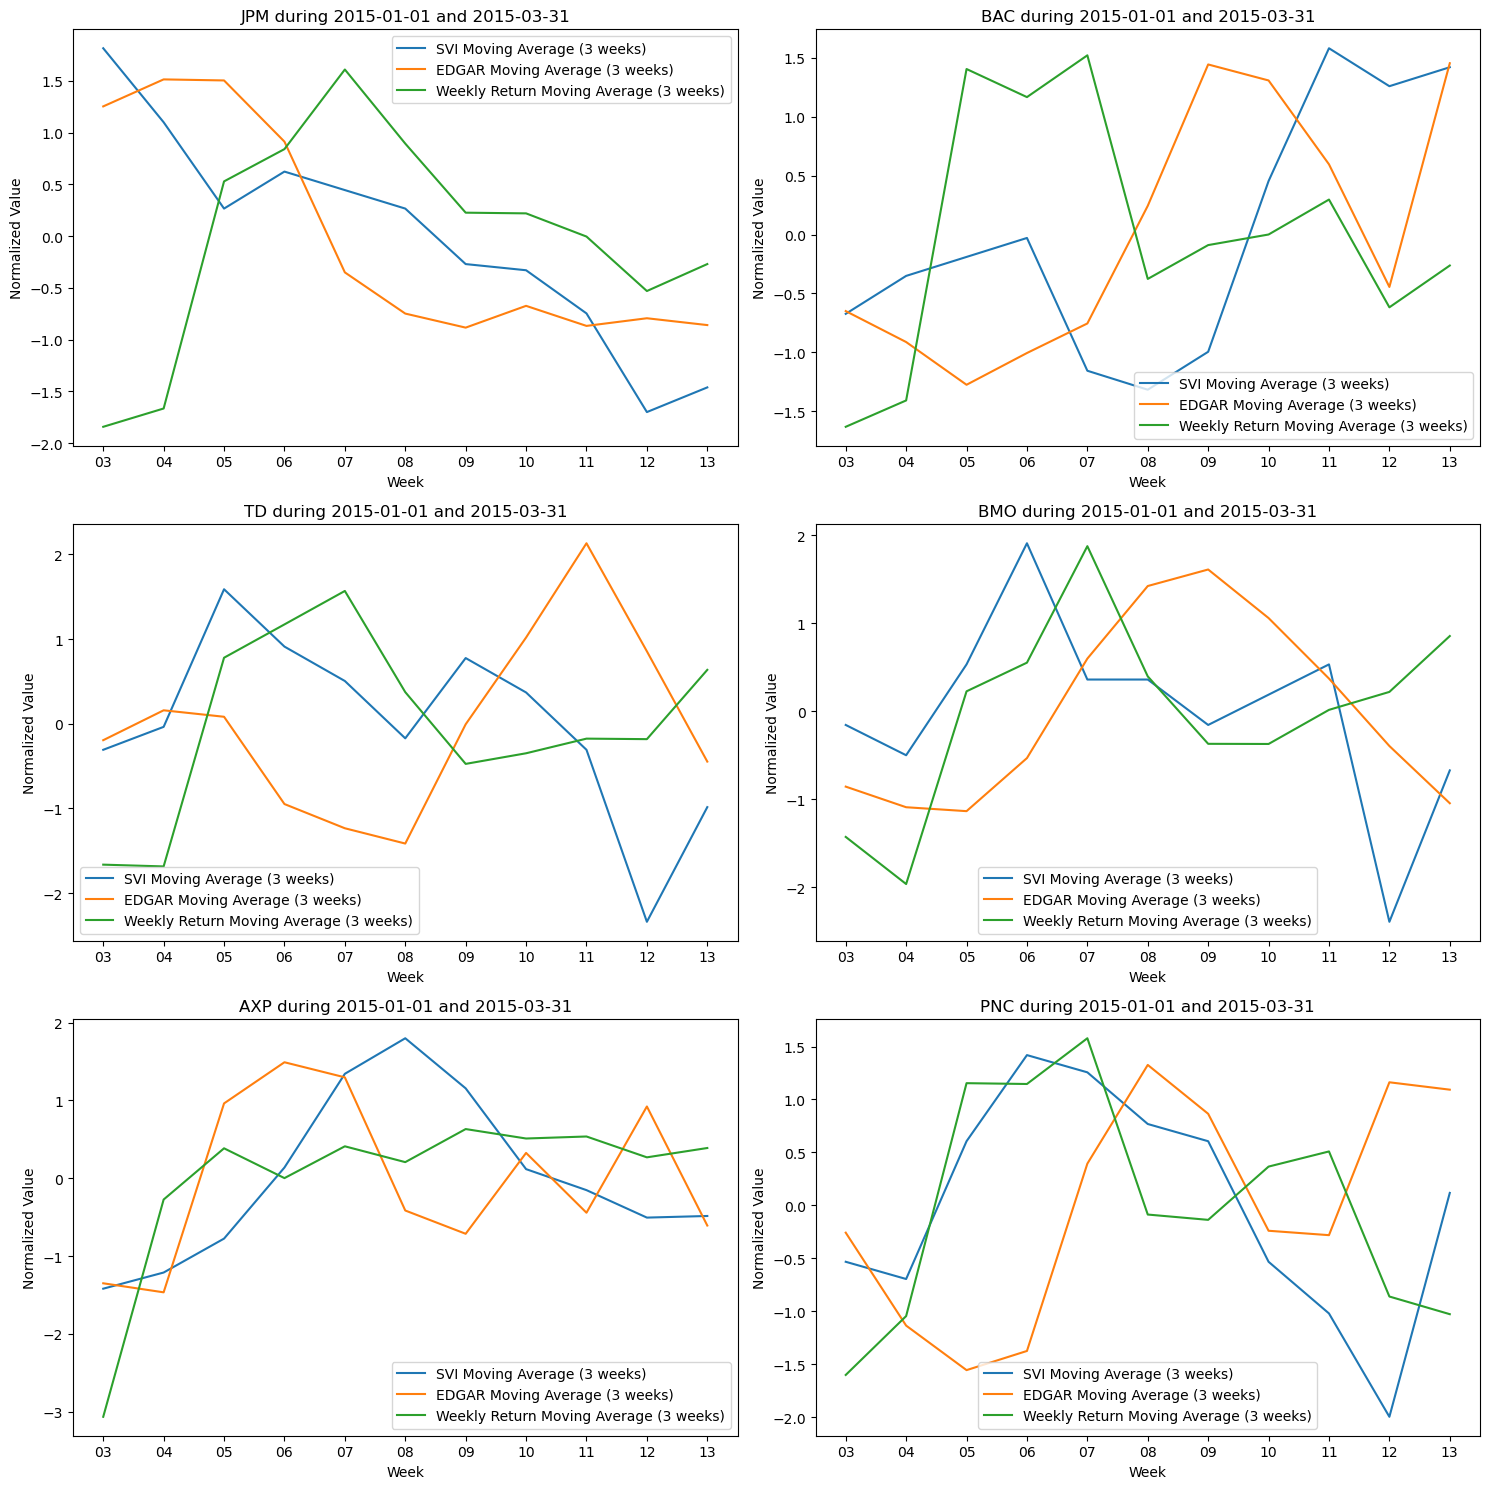

In [99]:
fin_com = ['JPM', 'BAC', 'TD', 'BMO', 'AXP', 'PNC']
plot_comparison_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

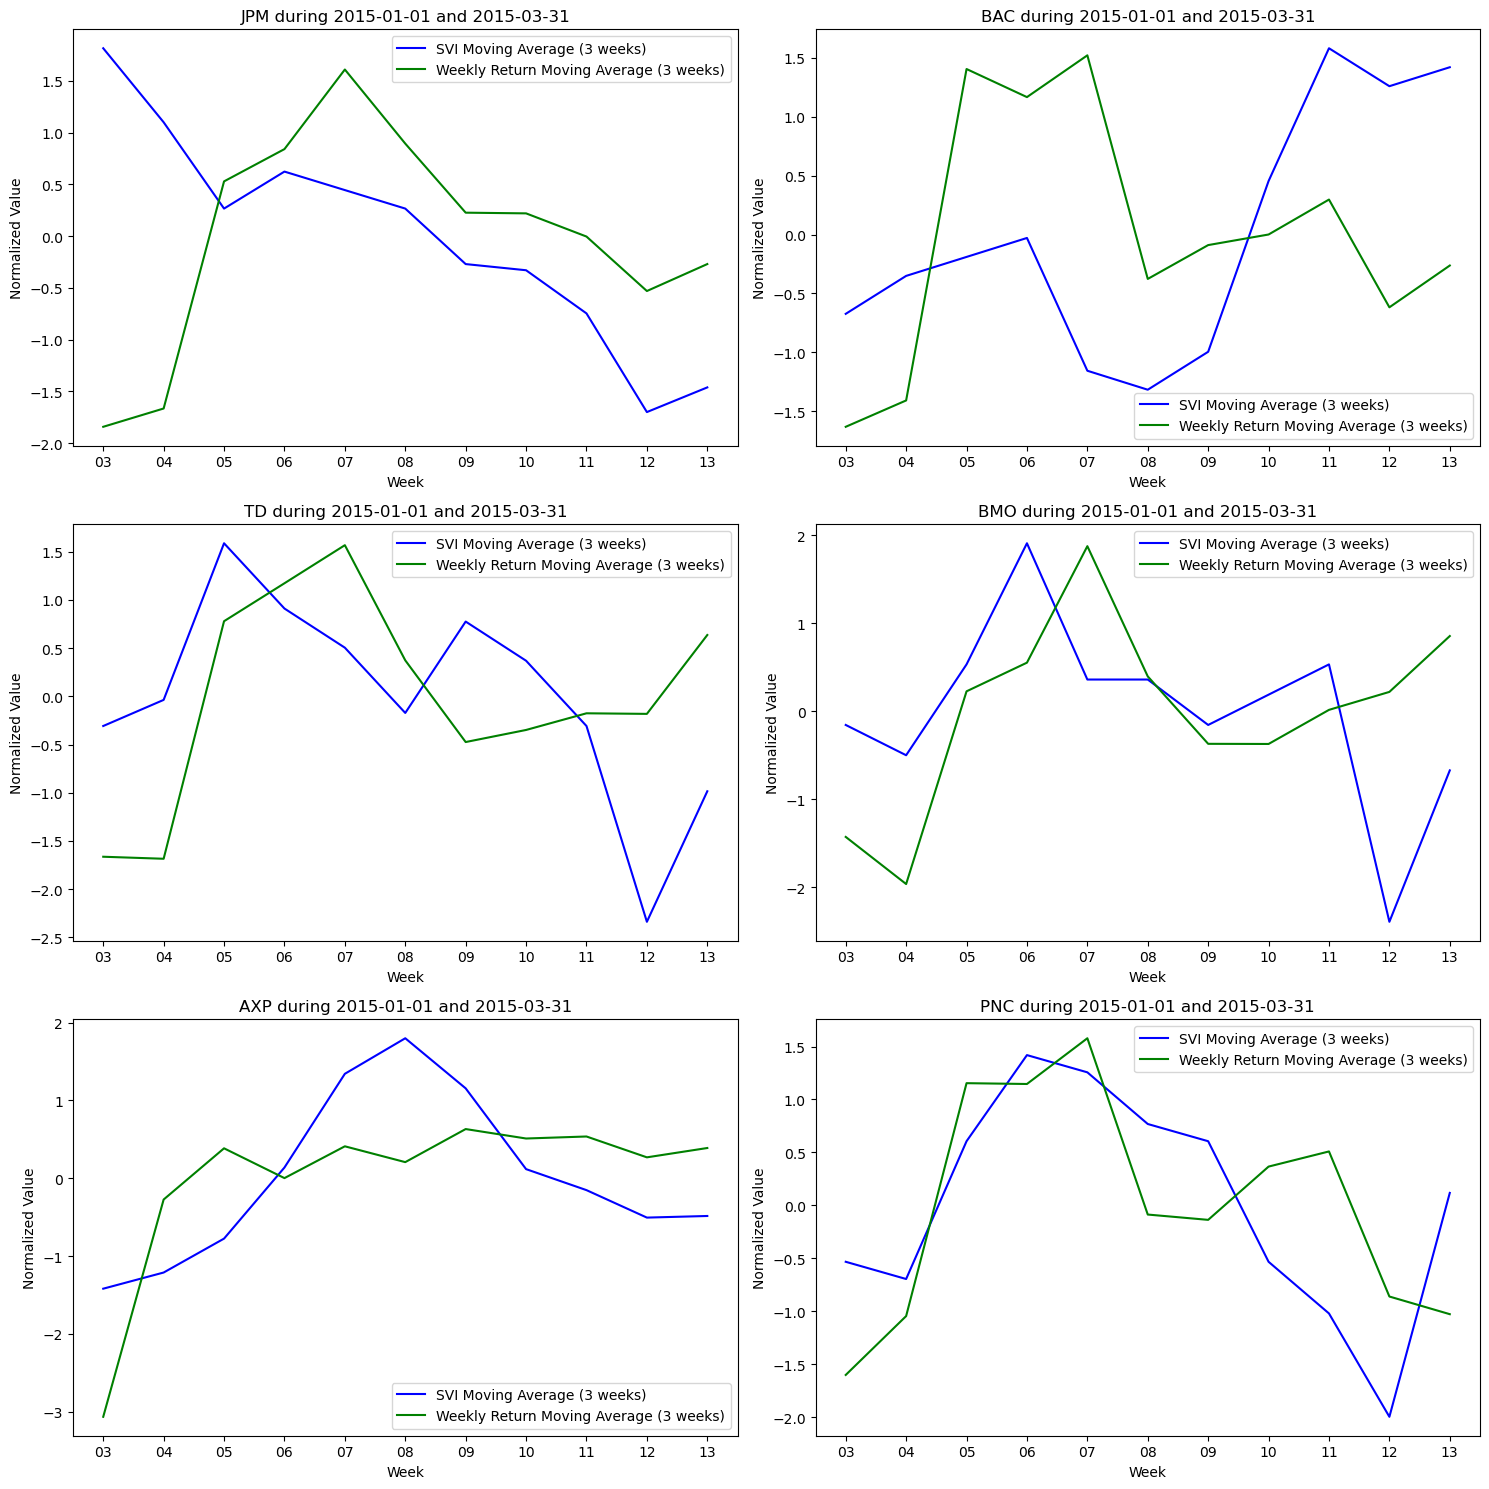

In [101]:
compare_svi_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

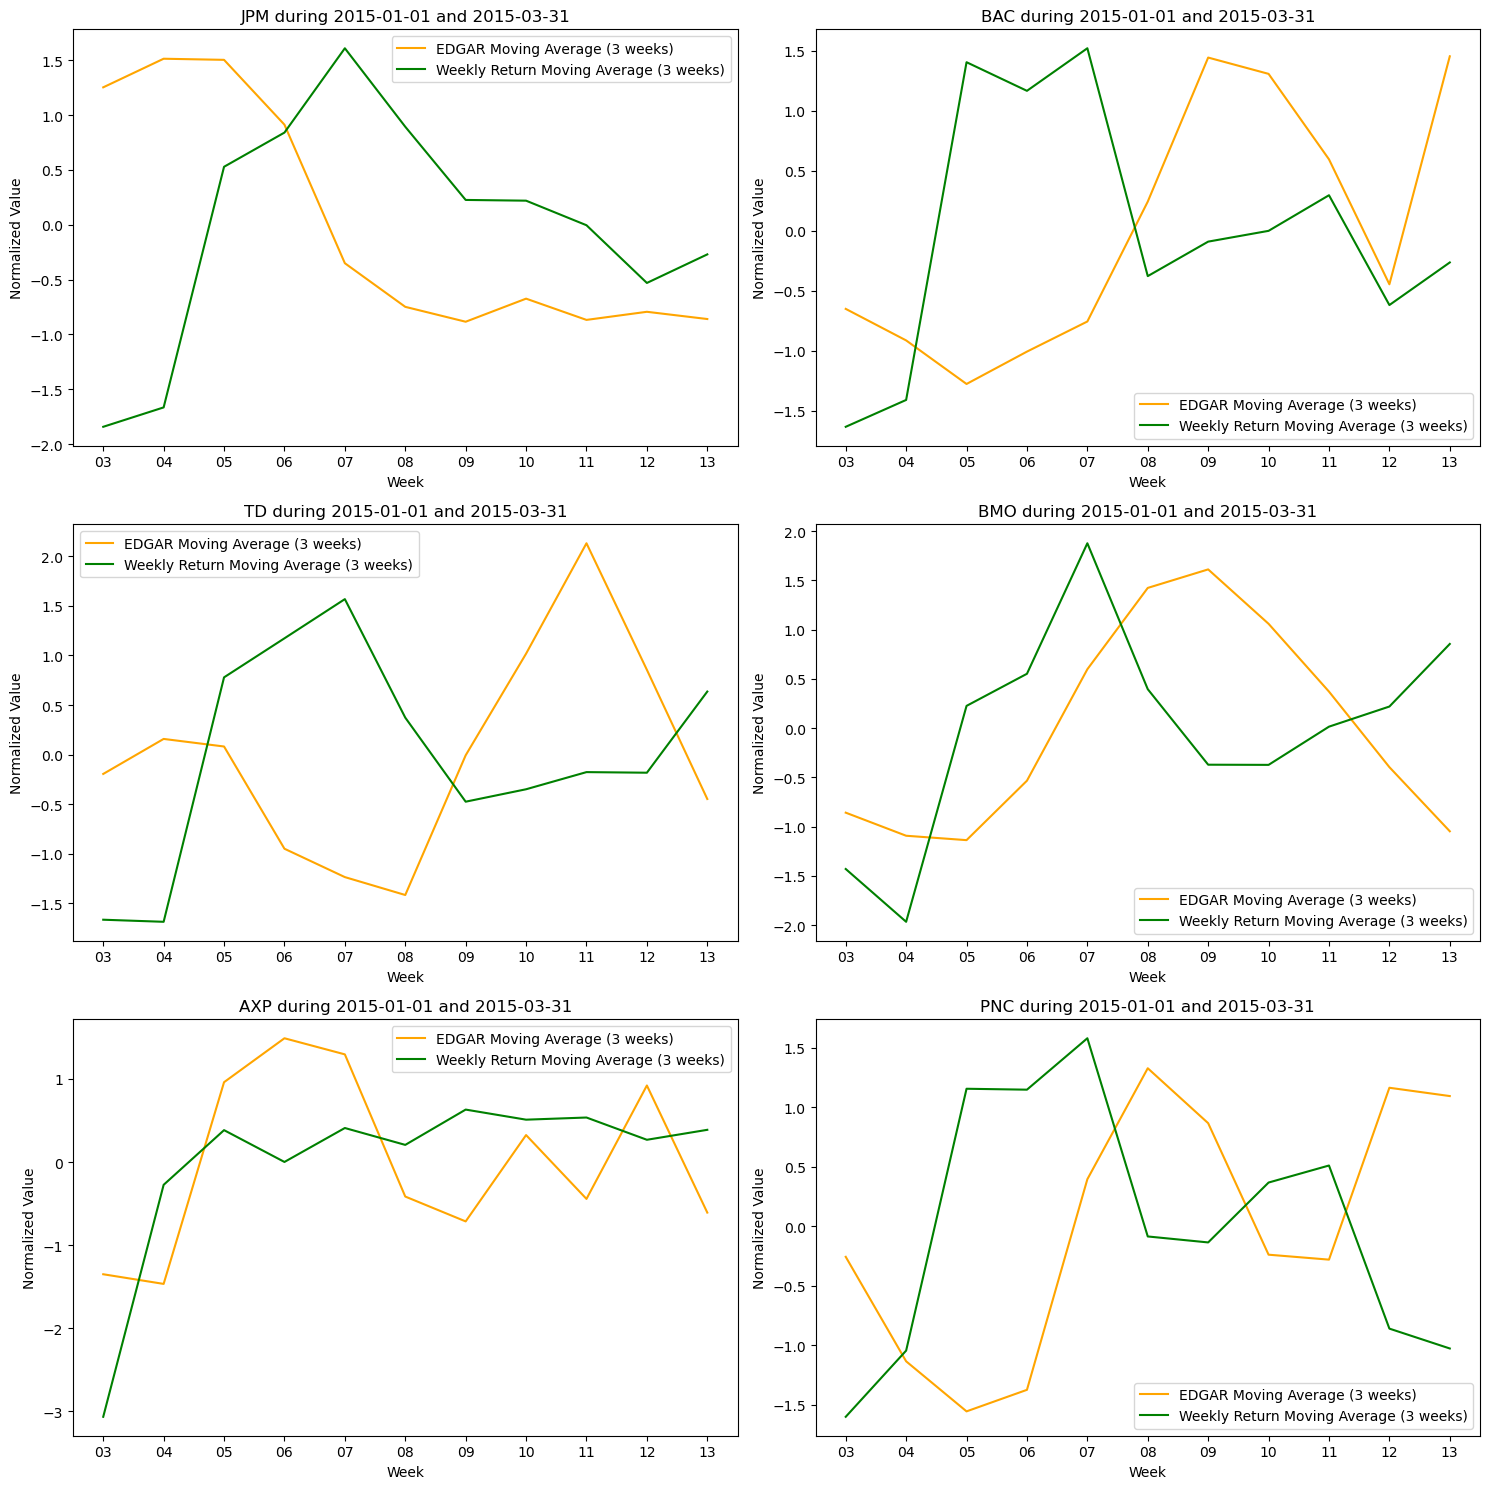

In [102]:
compare_edgar_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

For financial companies, SVI exhibits a greater correlation with return compared to EDGAR.

3. Consumer goods

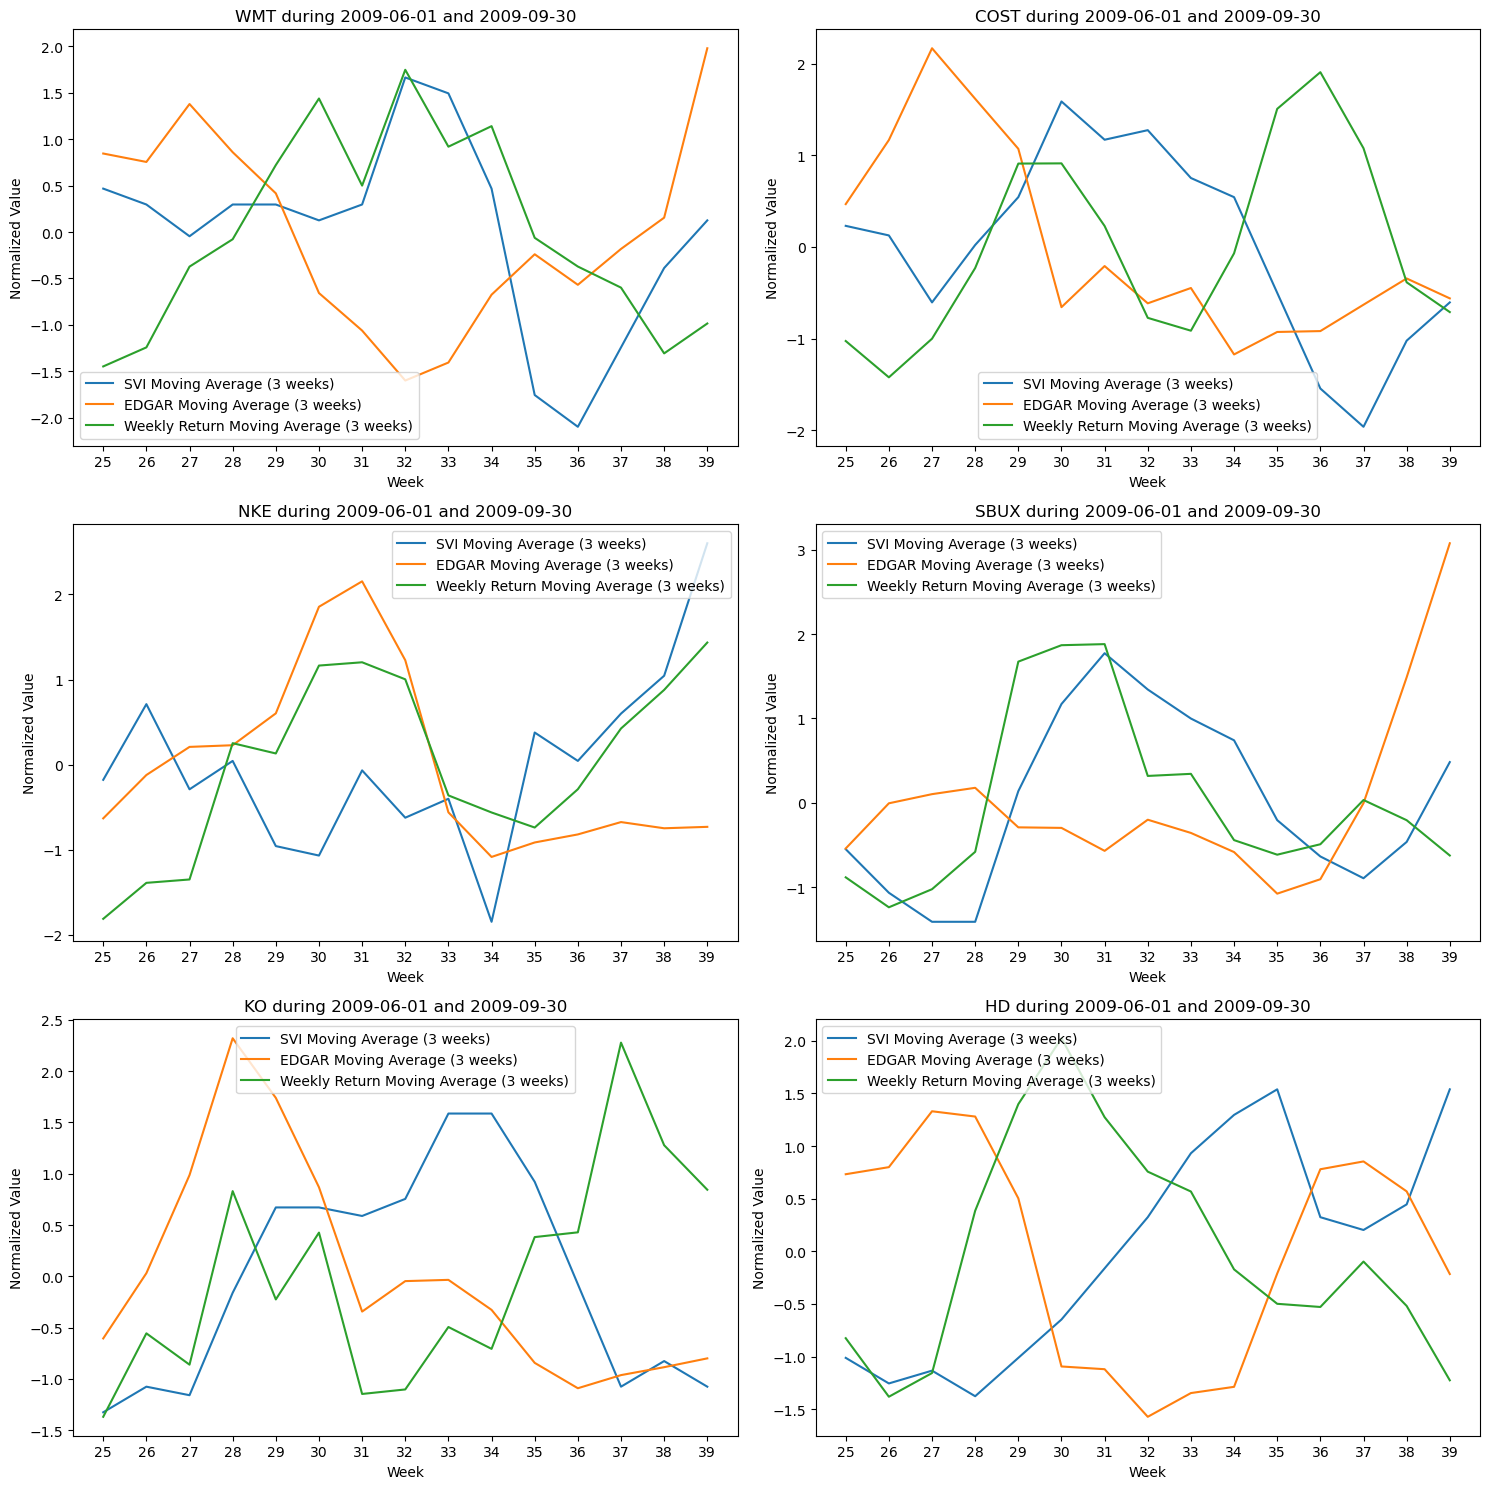

In [105]:
goods_com = ['WMT', 'COST', 'NKE', 'SBUX', 'KO', 'HD']
plot_comparison_grid(goods_com, '2009', '2009-06-01', '2009-09-30')

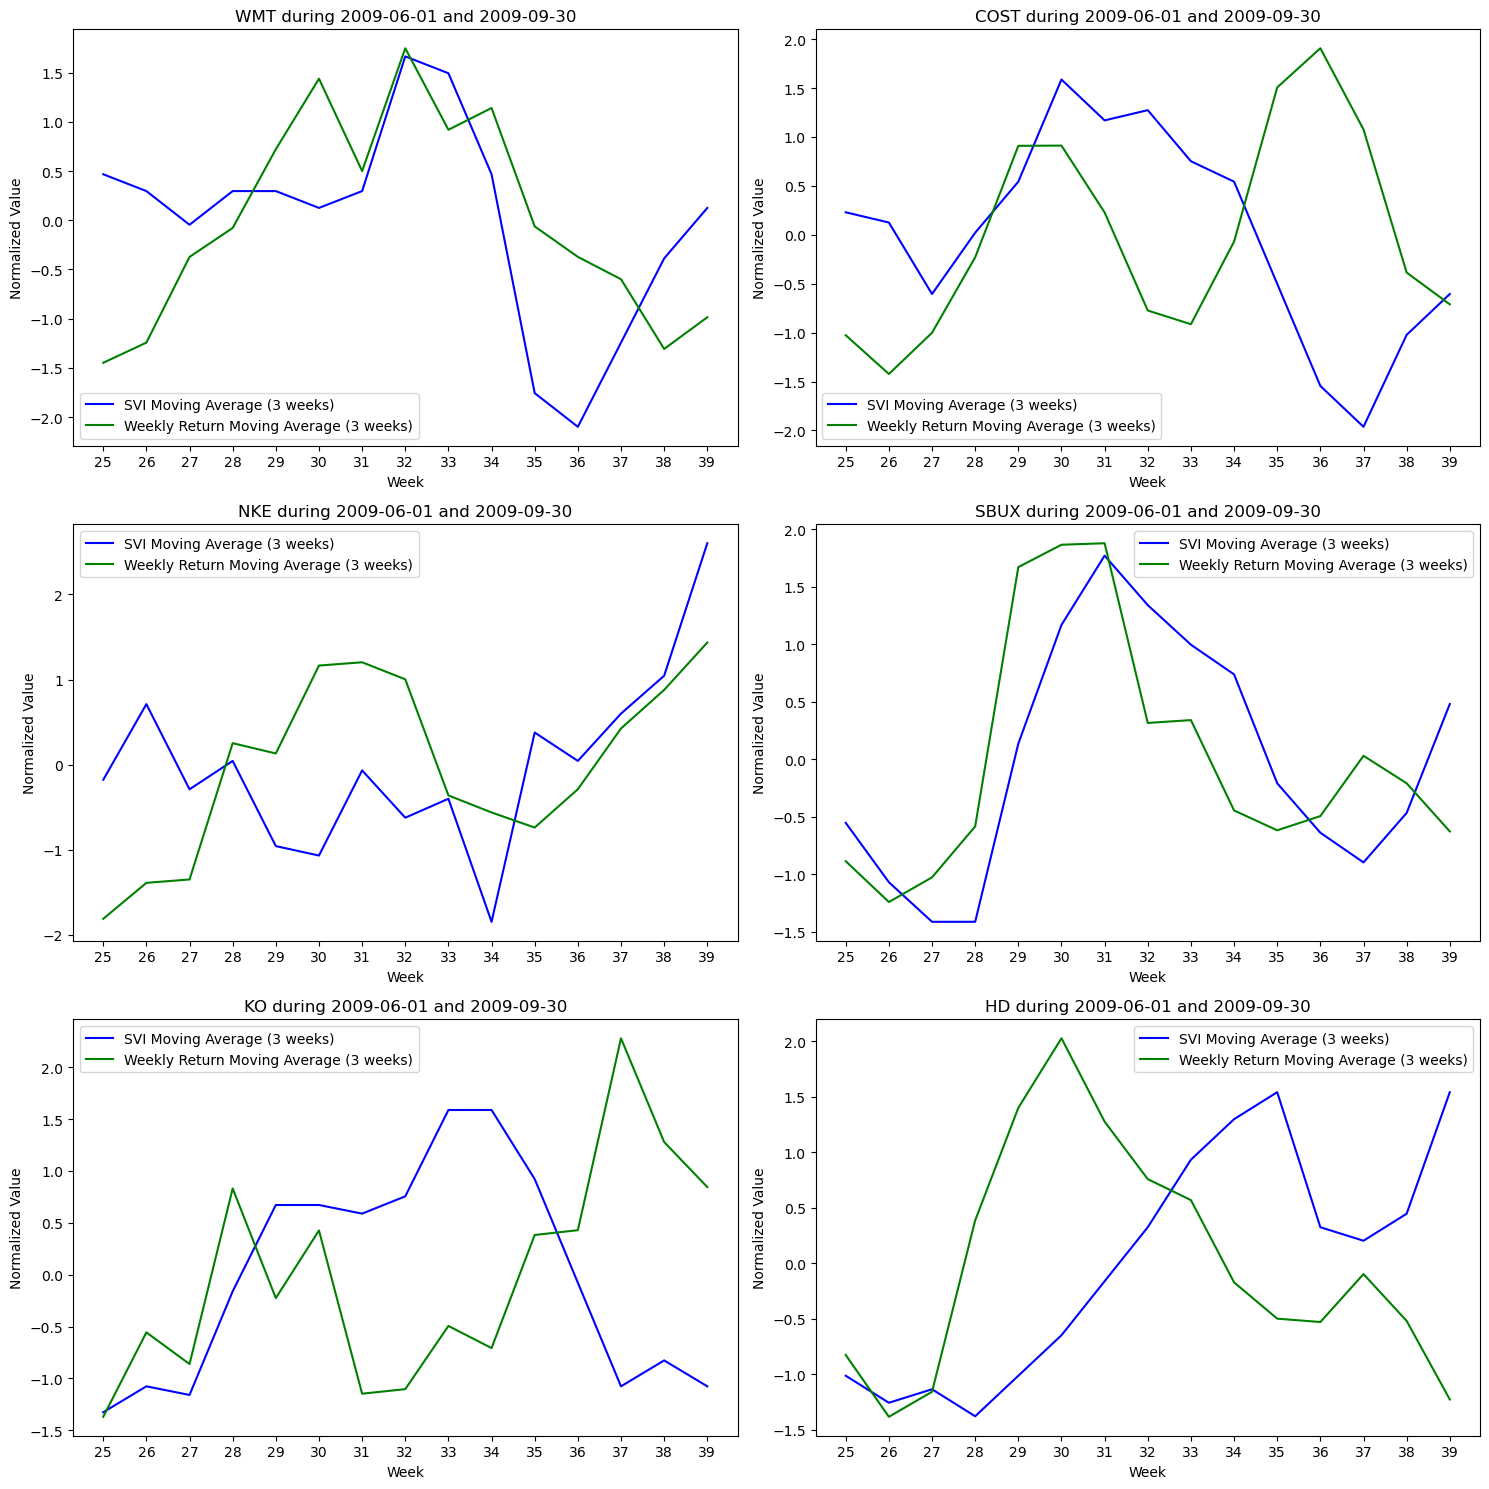

In [107]:
compare_svi_grid(goods_com, '2009', '2009-06-01', '2009-09-30')

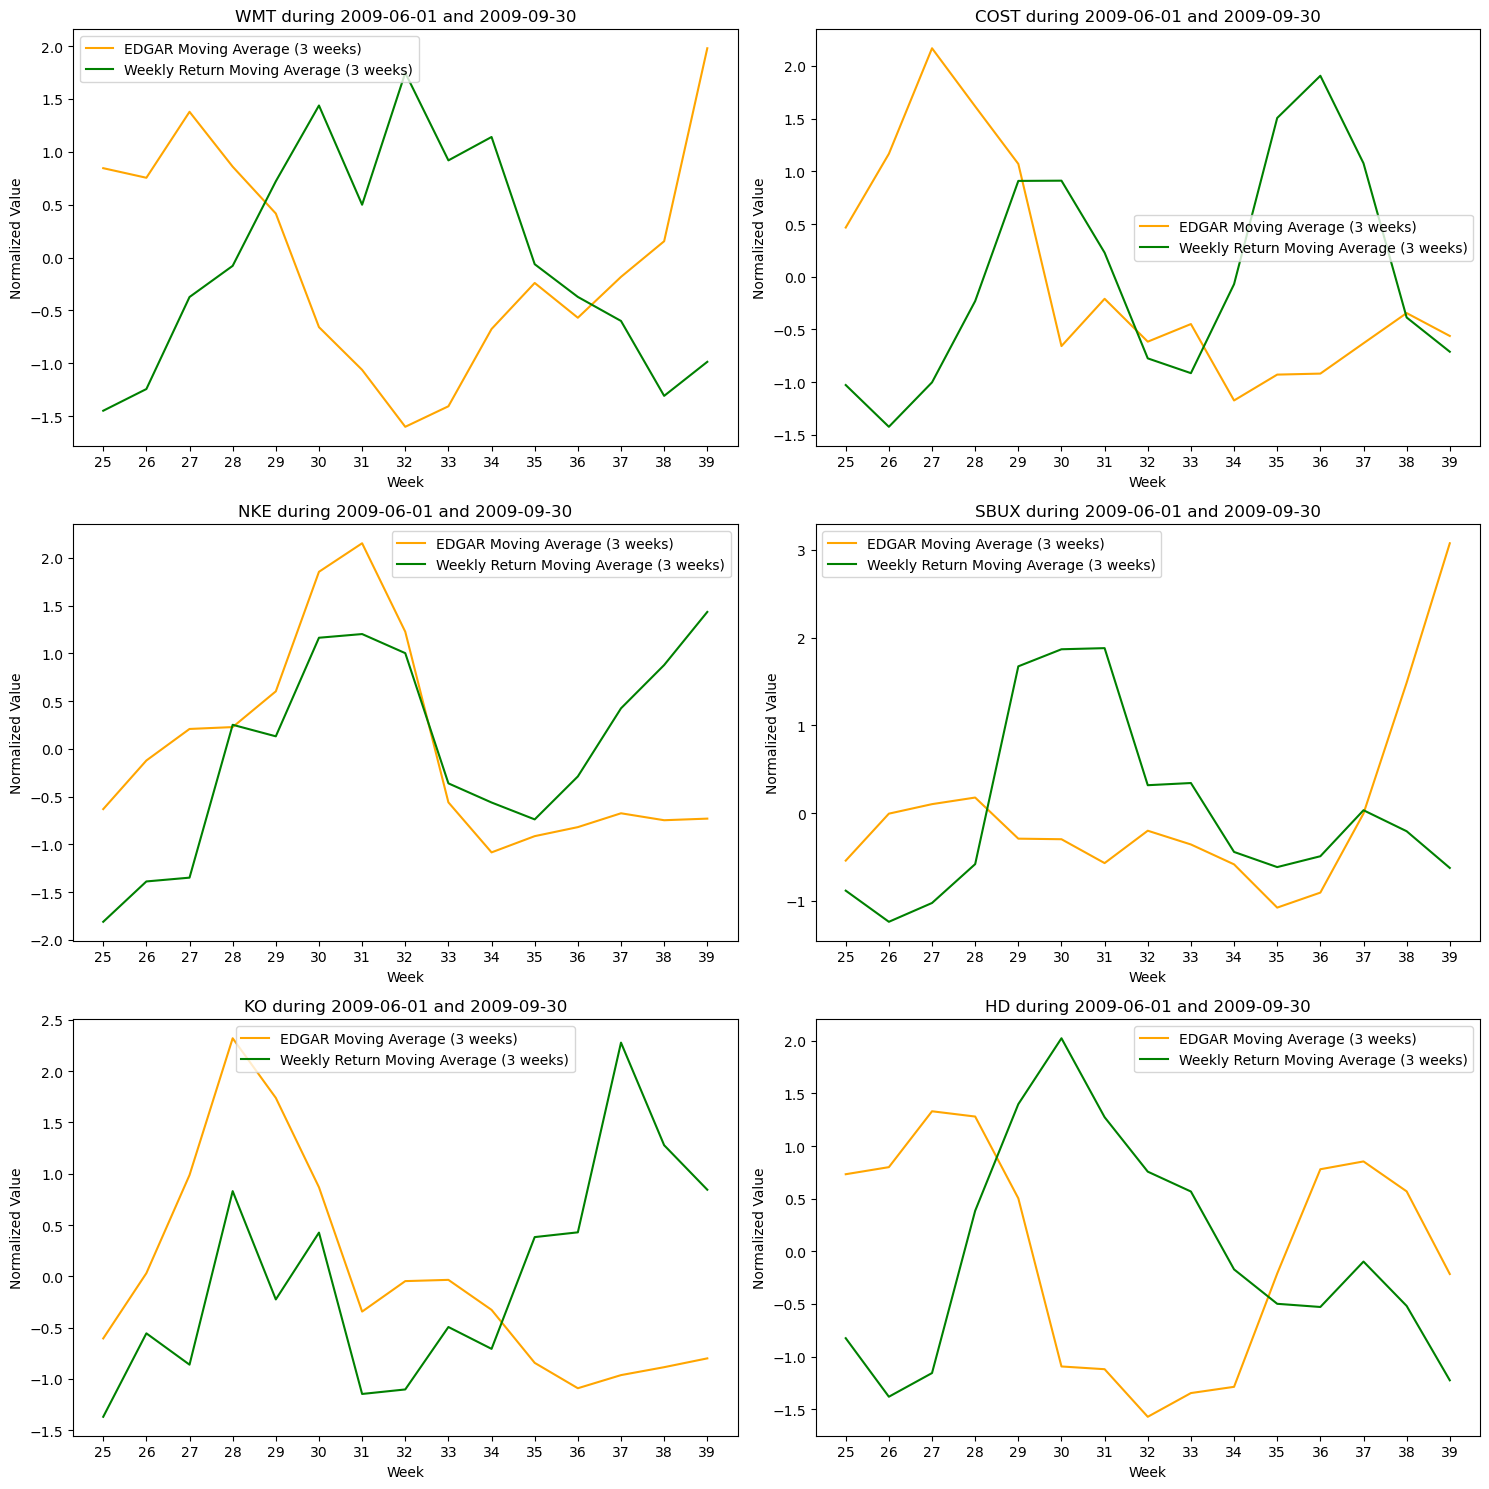

In [106]:
compare_edgar_grid(goods_com, '2009', '2009-06-01', '2009-09-30')